In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from textblob import TextBlob
from datetime import datetime

#### Tweets

In [2]:
tweets = pd.read_csv('trump_tweets.csv')
display(tweets.head())

,source,text,created_at,retweet_count,favorite_count
0,Twitter Media Studio,JOBS JOBS JOBS! https://t.co/QCtWgld2RW,12-06-2019 20:19:41,21151,72774
1,Twitter for iPhone,....The King said that the Saudi people are gr...,12-06-2019 19:18:22,13746,44606
2,Twitter for iPhone,King Salman of Saudi Arabia just called to exp...,12-06-2019 19:18:21,18641,64971
3,Twitter for iPhone,Just received a full briefing on the tragic sh...,12-06-2019 18:16:21,12682,53490
4,Twitter for iPhone,Without the horror show that is the Radical Le...,12-06-2019 16:00:28,22188,82131


##### Object column to datetime

In [3]:
tweets.loc[:,'created_at'] = pd.to_datetime(tweets.loc[:,'created_at'])

Filtramos las fechas de lo qe

In [4]:
tweets = tweets.loc[tweets['created_at'] >= datetime.strptime('2017-01-20', "%Y-%m-%d").date()]
tweets = tweets.loc[tweets['created_at'] <= datetime.strptime('2018-08-24', "%Y-%m-%d").date()]

C:\Users\Angel\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  """Entry point for launching an IPython kernel.
C:\Users\Angel\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  


##### To lowercase

In [5]:
tweets['text'] = tweets['text'].str.lower() 

#### Bolsa

In [6]:
bolsa = pd.read_csv('bolsa.csv', index_col=0)
bolsa = bolsa.reset_index(drop=True)
display(bolsa.head())

C:\Users\Angel\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,ticker,open,close,adj_close,low,high,volume,date
0,CRCM,8.40,8.43,8.43,8.28,8.48,67100,2017-01-20
1,CRCM,8.44,8.41,8.41,8.26,8.48,27300,2017-01-23
2,CRCM,8.42,8.43,8.43,8.37,8.49,65700,2017-01-24
3,CRCM,8.42,8.47,8.47,8.41,8.53,45200,2017-01-25
4,CRCM,8.69,8.45,8.45,8.43,8.73,70400,2017-01-26


##### Value at open vs value at close

In [7]:
bolsa['difference'] = (bolsa['close'] - bolsa['open'])/(bolsa['open']) * 100

##### Column stating if the values went down 

In [8]:
bolsa['goes_down'] = bolsa['difference'] < 0

##### To datetime

In [9]:
bolsa.loc[:,'date'] = pd.to_datetime(bolsa.loc[:,'date'])

#### Tickers

In [10]:
tickers = pd.read_csv('historical_stocks.csv')
display(tickers.head())

,ticker,exchange,name,sector,industry
0,PIH,NASDAQ,"1347 PROPERTY INSURANCE HOLDINGS, INC.",FINANCE,PROPERTY-CASUALTY INSURERS
1,PIHPP,NASDAQ,"1347 PROPERTY INSURANCE HOLDINGS, INC.",FINANCE,PROPERTY-CASUALTY INSURERS
2,TURN,NASDAQ,180 DEGREE CAPITAL CORP.,FINANCE,FINANCE/INVESTORS SERVICES
3,FLWS,NASDAQ,"1-800 FLOWERS.COM, INC.",CONSUMER SERVICES,OTHER SPECIALTY STORES
4,FCCY,NASDAQ,1ST CONSTITUTION BANCORP (NJ),FINANCE,SAVINGS INSTITUTIONS


#### Bolsa w/ extended info

In [11]:
bolsa.head()

,ticker,open,close,adj_close,low,high,volume,date,difference,goes_down
0,CRCM,8.40,8.43,8.43,8.28,8.48,67100,2017-01-20,0.357151,False
1,CRCM,8.44,8.41,8.41,8.26,8.48,27300,2017-01-23,-0.355447,True
2,CRCM,8.42,8.43,8.43,8.37,8.49,65700,2017-01-24,0.118768,False
3,CRCM,8.42,8.47,8.47,8.41,8.53,45200,2017-01-25,0.593826,False
4,CRCM,8.69,8.45,8.45,8.43,8.73,70400,2017-01-26,-2.761793,True


In [12]:
tickers.head()

,ticker,exchange,name,sector,industry
0,PIH,NASDAQ,"1347 PROPERTY INSURANCE HOLDINGS, INC.",FINANCE,PROPERTY-CASUALTY INSURERS
1,PIHPP,NASDAQ,"1347 PROPERTY INSURANCE HOLDINGS, INC.",FINANCE,PROPERTY-CASUALTY INSURERS
2,TURN,NASDAQ,180 DEGREE CAPITAL CORP.,FINANCE,FINANCE/INVESTORS SERVICES
3,FLWS,NASDAQ,"1-800 FLOWERS.COM, INC.",CONSUMER SERVICES,OTHER SPECIALTY STORES
4,FCCY,NASDAQ,1ST CONSTITUTION BANCORP (NJ),FINANCE,SAVINGS INSTITUTIONS


In [13]:
merged = pd.merge(bolsa, tickers, on=['ticker'])

In [ ]:
merged.head(10)

In [15]:
empresas = ['amazon', 'facebook', 'general motors', 'toyota', 'alphabet', 'ibm', 'apple', 'microsoft', 'netflix', 'american airlines', 'amd', 'ebay', 'tesla', 'alibaba']

In [16]:
def word_sentiments(word, tweet_df):
    tweet_batch = tweet_df.loc[tweet_df.loc[:, 'text'].str.contains(fr'\b{word}')].copy()
    
    sentiments = []
    for tweet in tweet_batch['text']:
        sentiments.append(TextBlob(tweet).sentiment.polarity)
    
    tweet_batch['sentiment'] = sentiments
    
    return tweet_batch

In [17]:
tweet_count = []
tweet_collection = []
for empresa in empresas:
    batch = word_sentiments(empresa, tweets)
    tweet_count.append(len(batch))
    tweet_collection.append(batch)

In [18]:
zipped = list(zip(empresas, tweet_count))

In [19]:
for pair in zipped:
    print(pair)

('amazon', 21)
('facebook', 8)
('general motors', 1)
('toyota', 3)
('alphabet', 0)
('ibm', 0)
('apple', 4)
('microsoft', 0)
('netflix', 0)
('american airlines', 1)
('amd', 0)
('ebay', 0)
('tesla', 0)
('alibaba', 0)


#### Tweet sentiment

##### Filtering

In [20]:
batch = word_sentiments('amazon', tweets)

In [21]:
merged.head()

,ticker,open,close,adj_close,low,high,volume,date,difference,goes_down,exchange,name,sector,industry
0,CRCM,8.40,8.43,8.43,8.28,8.48,67100,2017-01-20,0.357151,False,NYSE,"CARE.COM, INC.",CONSUMER SERVICES,OTHER CONSUMER SERVICES
1,CRCM,8.44,8.41,8.41,8.26,8.48,27300,2017-01-23,-0.355447,True,NYSE,"CARE.COM, INC.",CONSUMER SERVICES,OTHER CONSUMER SERVICES
2,CRCM,8.42,8.43,8.43,8.37,8.49,65700,2017-01-24,0.118768,False,NYSE,"CARE.COM, INC.",CONSUMER SERVICES,OTHER CONSUMER SERVICES
3,CRCM,8.42,8.47,8.47,8.41,8.53,45200,2017-01-25,0.593826,False,NYSE,"CARE.COM, INC.",CONSUMER SERVICES,OTHER CONSUMER SERVICES
4,CRCM,8.69,8.45,8.45,8.43,8.73,70400,2017-01-26,-2.761793,True,NYSE,"CARE.COM, INC.",CONSUMER SERVICES,OTHER CONSUMER SERVICES


In [34]:
merged = merged[~merged['ticker'].isin(['APLE'])]

In [35]:
name = 'APPLE'

In [36]:
company_stocks = merged.loc[merged.loc[:,"name"].str.contains(fr'\b{name}')].copy()
len(company_stocks)

403

In [24]:
company_stocks.head()

,ticker,open,close,adj_close,low,high,volume,date,difference,goes_down,exchange,name,sector,industry
7601,AAPL,120.449997,120.000000,116.759972,119.730003,120.449997,32597900,2017-01-20,-0.373596,True,NASDAQ,APPLE INC.,TECHNOLOGY,COMPUTER MANUFACTURING
7602,AAPL,120.000000,120.080002,116.837799,119.769997,120.809998,22050200,2017-01-23,0.066668,False,NASDAQ,APPLE INC.,TECHNOLOGY,COMPUTER MANUFACTURING
7603,AAPL,119.550003,119.970001,116.730774,119.500000,120.099998,23211000,2017-01-24,0.351316,False,NASDAQ,APPLE INC.,TECHNOLOGY,COMPUTER MANUFACTURING
7604,AAPL,120.419998,121.879997,118.589195,120.279999,122.099998,32377600,2017-01-25,1.212422,False,NASDAQ,APPLE INC.,TECHNOLOGY,COMPUTER MANUFACTURING
7605,AAPL,121.669998,121.940002,118.647583,121.599998,122.440002,26337600,2017-01-26,0.221915,False,NASDAQ,APPLE INC.,TECHNOLOGY,COMPUTER MANUFACTURING


In [25]:
company_stocks['ticker'].value_counts()

APLE    403
AAPL    403
Name: ticker, dtype: int64

In [26]:
company_stocks['industry'].value_counts()

COMPUTER MANUFACTURING           403
REAL ESTATE INVESTMENT TRUSTS    403
Name: industry, dtype: int64

In [37]:
def get_companies_transactions(companies, tweets_df, stocks_df):
    polarities, differences, related_company = [] , [], []
    for company in companies:
        
        tweets = word_sentiments(company, tweets_df)
        company_stocks = stocks_df.loc[stocks_df.loc[:,"name"].str.contains(fr'\b{company.upper()}')].copy()
        
        for _, tweet in tweets.iterrows():
            
            open_ = company_stocks.loc[company_stocks["date"]==tweet.created_at.date(), "open"]
            
            if len(open_) == 0:
                for _, row in company_stocks.iterrows():
                    if row.date.date() > tweet.created_at.date():
                        open_ = company_stocks.loc[company_stocks['date'] == row.date, 'open']
                        break
                        
            close_ = company_stocks.loc[open_.index+1,"close"]
            dif_ = (close_.values - open_.values)/open_.values*100
            
            polarities.append(tweet.sentiment)
            differences.append(dif_)
            related_company.append(company)
            
    return polarities, differences, related_company

In [38]:
pol, diff, rel =  get_companies_transactions(empresas, tweets, merged)

C:\Users\Angel\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and 'the values will not compare equal to the
'datetime.date'. To retain the current behavior, convert the
'datetime.date' to a datetime with 'pd.Timestamp'.
  # Remove the CWD from sys.path while we load stuff.


In [39]:
diff

[array([2.00841932]),
 array([1.92981877]),
 array([-2.7302138]),
 array([0.9397382]),
 array([0.9397382]),
 array([1.10321029]),
 array([-2.54925554]),
 array([1.37920204]),
 array([-1.80372359]),
 array([-1.80372359]),
 array([-1.80372359]),
 array([-2.41891961]),
 array([0.56328789]),
 array([-2.14740657]),
 array([-1.24100831]),
 array([1.42093341]),
 array([1.42093341]),
 array([1.42093341]),
 array([1.12122738]),
 array([1.12122738]),
 array([-0.26774259]),
 array([1.21749977]),
 array([1.21749977]),
 array([-1.94063582]),
 array([-1.94063582]),
 array([1.70584806]),
 array([-4.31232672]),
 array([-0.65149897]),
 array([1.22570057]),
 array([-0.5038415]),
 array([0.37310301]),
 array([0.13165212]),
 array([0.32524183]),
 array([0.72819951]),
 array([-0.10065288]),
 array([0.9838926]),
 array([1.76554114]),
 array([2.42645711])]

In [40]:
rel

['amazon',
 'amazon',
 'amazon',
 'amazon',
 'amazon',
 'amazon',
 'amazon',
 'amazon',
 'amazon',
 'amazon',
 'amazon',
 'amazon',
 'amazon',
 'amazon',
 'amazon',
 'amazon',
 'amazon',
 'amazon',
 'amazon',
 'amazon',
 'amazon',
 'facebook',
 'facebook',
 'facebook',
 'facebook',
 'facebook',
 'facebook',
 'facebook',
 'facebook',
 'general motors',
 'toyota',
 'toyota',
 'toyota',
 'apple',
 'apple',
 'apple',
 'apple',
 'american airlines']

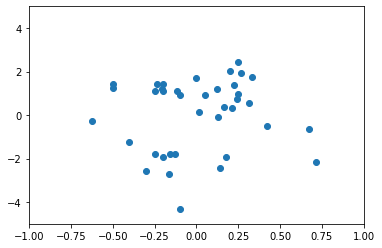

In [49]:
import numpy as np
plt.xlim((-1, 1))
plt.ylim((-5, 5))
plt.scatter(pol, diff)